In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
import plotly.graph_objects as go
import pandas as pd



sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/niallmcnulty/Desktop/GeneralAssembly/Lessons/DSI11-lessons/projects/CAPSTONE/Data/FOOTBALLER-UPDATE.csv')

In [3]:
df.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,defending_standing_tackle,defending_sliding_tackle,player_league,likes,dislikes,follows,comments,minutes_played_overall,goals_overall,clean_sheets_overall
0,Kevin De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,355000,...,58,51,English Premier League,261.0,21.0,1027.0,Even if a lot of people will disagree I state ...,974,2,12
1,Luka Modrić,32,172,66,Croatia,Real Madrid,91,91,67000000,420000,...,76,73,Spain Primera Division,82.0,16.0,255.0,Hes the best midfielder in the world This guy ...,2618,3,11
2,Eden Hazard,27,173,74,Belgium,Chelsea,91,91,93000000,340000,...,27,22,English Premier League,292.0,51.0,873.0,87 or 88 nothing more Doesnt make sense for hi...,2926,16,15
3,Diego Godín,32,187,78,Uruguay,Atlético Madrid,90,90,44000000,125000,...,89,89,Spain Primera Division,38.0,11.0,186.0,Been such a wall in the beginning though since...,2508,3,16
4,Toni Kroos,28,183,76,Germany,Real Madrid,90,90,76500000,355000,...,82,69,Spain Primera Division,109.0,24.0,467.0,Parejo Jorginho is his clone do you really th...,2227,0,7


In [4]:
df.columns

Index(['name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'body_type',
       'release_clause_eur', 'team_position', 'team_jersey_number',
       'years_at_club', 'contract_valid_until', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_

In [5]:
data =  df[['age','height_cm', 'weight_kg','overall', 'potential', 'value_eur','preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'body_type', 'team_position', 'team_jersey_number',
       'years_at_club', 'contract_valid_until', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic','player_league', 'likes', 'dislikes',
       'follows', 'minutes_played_overall', 'goals_overall',
       'clean_sheets_overall']]

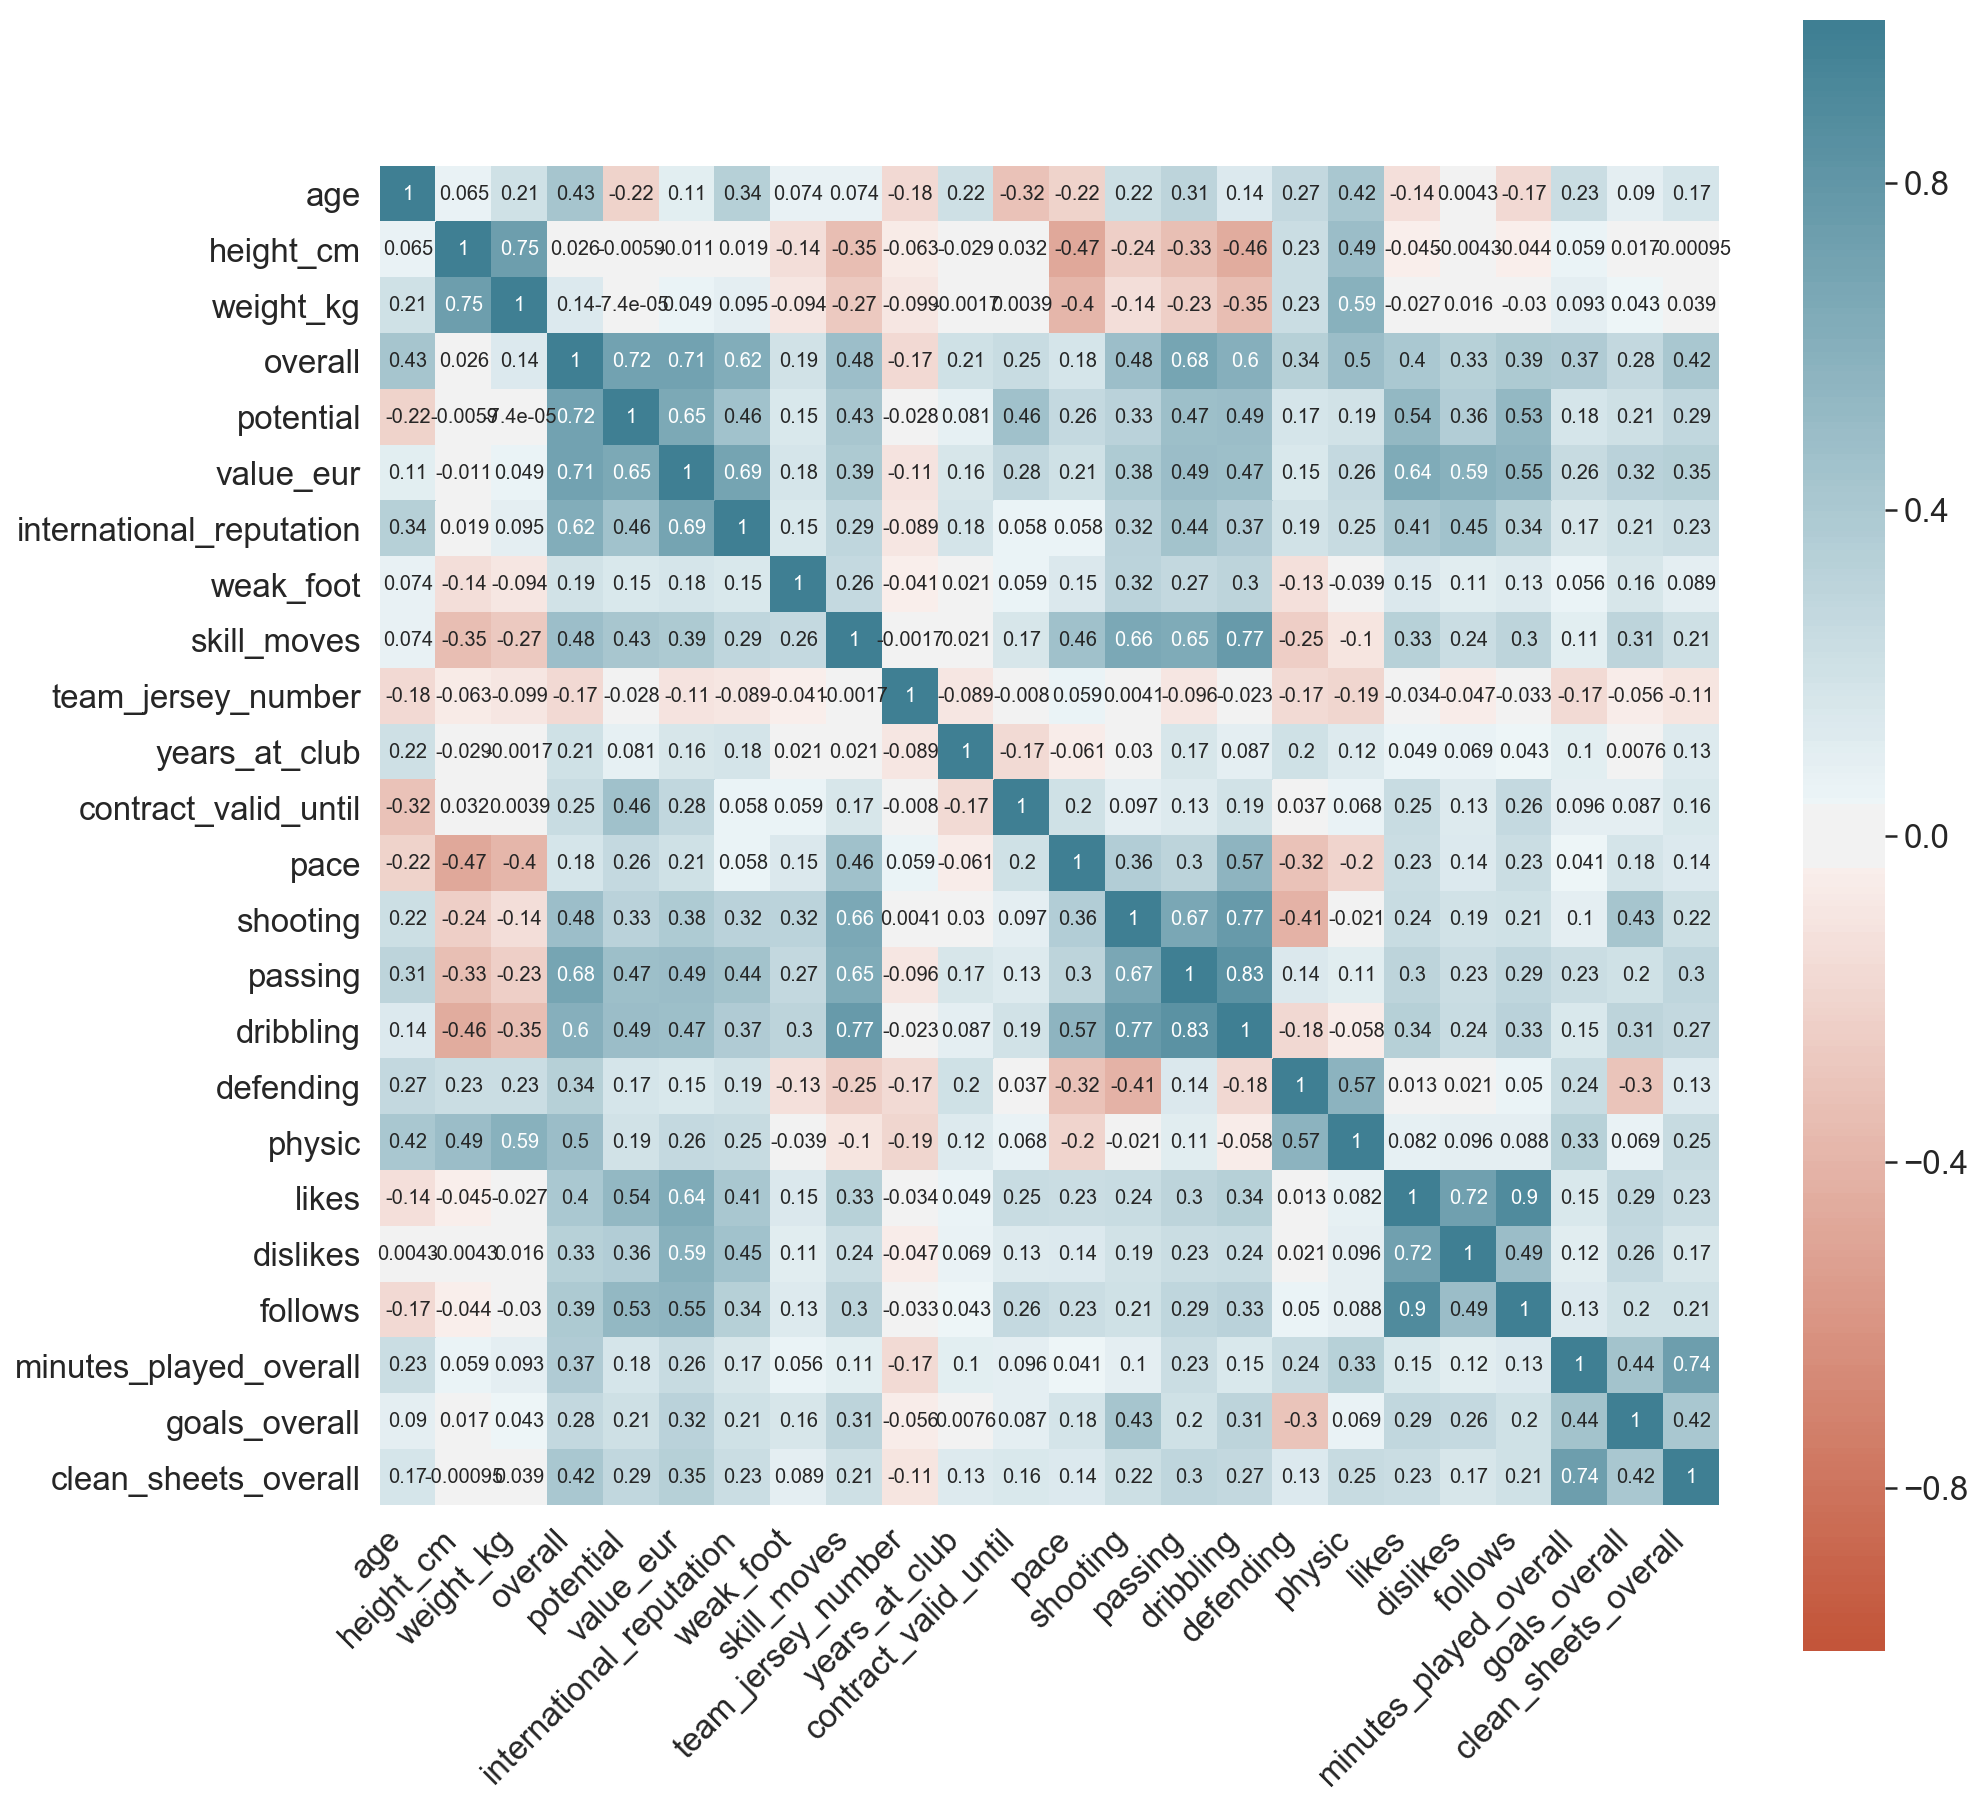

In [52]:
fig, ax = plt.subplots(figsize=(15,15)) 
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
fig.savefig("heatmap.pdf", bbox_inches='tight')

In [7]:
fig.savefig("heatmap.pdf", bbox_inches='tight')

In [8]:
df.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,likes,dislikes,follows,minutes_played_overall,goals_overall,clean_sheets_overall
count,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4.469000e+03,4469.000000,4469.000000,4469.000000,4469.000000,...,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000
mean,25.078541,181.492728,75.369881,69.565227,74.391363,4.903731e+06,18744.685612,1.252629,3.065563,2.687626,...,64.218841,54.129112,54.876482,52.432088,16.189752,1.502350,125.367196,1321.818304,2.030879,5.366972
std,4.363965,6.168933,6.600704,7.179908,6.343963,8.572204e+06,34176.708126,0.569632,0.666333,0.675032,...,10.190376,17.912453,20.046375,20.133866,45.007403,6.494802,338.676626,964.706961,3.387855,4.287825
min,16.000000,161.000000,54.000000,48.000000,54.000000,4.000000e+04,1000.000000,1.000000,1.000000,2.000000,...,33.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,177.000000,70.000000,65.000000,70.000000,5.750000e+05,2000.000000,1.000000,3.000000,2.000000,...,58.000000,39.000000,37.000000,34.000000,0.000000,0.000000,2.000000,432.000000,0.000000,2.000000
50%,25.000000,182.000000,75.000000,70.000000,74.000000,1.500000e+06,6000.000000,1.000000,3.000000,3.000000,...,65.000000,59.000000,62.000000,60.000000,2.000000,0.000000,14.000000,1250.000000,1.000000,5.000000
75%,28.000000,186.000000,80.000000,75.000000,79.000000,6.000000e+06,21000.000000,1.000000,3.000000,3.000000,...,72.000000,68.000000,71.000000,68.000000,11.000000,1.000000,83.000000,2115.000000,3.000000,8.000000
max,39.000000,202.000000,101.000000,94.000000,95.000000,1.185000e+08,455000.000000,5.000000,5.000000,5.000000,...,95.000000,94.000000,93.000000,91.000000,866.000000,280.000000,5074.000000,3555.000000,33.000000,23.000000


In [9]:
del df['release_clause_eur']

In [10]:
del df['potential'] 

In [11]:
del df['wage_eur']

In [12]:
del df['body_type']

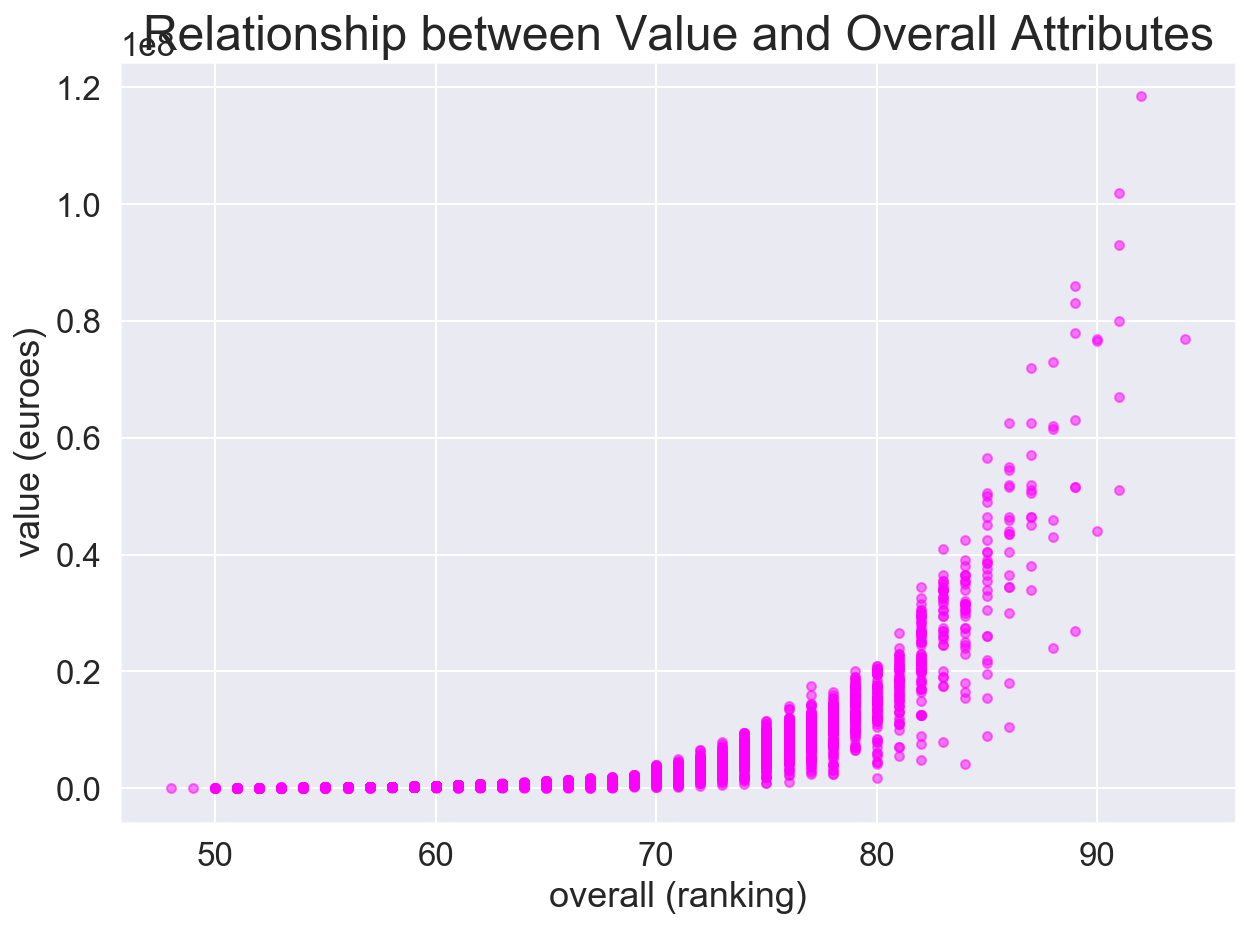

In [13]:
df.plot(kind='scatter', x='overall',y='value_eur', color='magenta',alpha=0.5, figsize=(10,7))
plt.title('Relationship between Value and Overall Attributes', size=24)
plt.xlabel('overall (ranking)', size=18)
plt.ylabel('value (euroes)', size=18);

In [14]:
df.dtypes

name                           object
age                             int64
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
value_eur                       int64
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
team_position                  object
team_jersey_number              int64
years_at_club                 float64
contract_valid_until            int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_vo

In [15]:
dummies = pd.get_dummies(df, columns =['preferred_foot','weak_foot','skill_moves','team_position','contract_valid_until','international_reputation'],drop_first=True)

In [16]:
dummies

,name,age,height_cm,weight_kg,nationality,club,overall,value_eur,team_jersey_number,years_at_club,...,contract_valid_until_2021,contract_valid_until_2022,contract_valid_until_2023,contract_valid_until_2024,contract_valid_until_2025,contract_valid_until_2026,international_reputation_2,international_reputation_3,international_reputation_4,international_reputation_5
0,Kevin De Bruyne,27,181,70,Belgium,Manchester City,91,102000000,17,4.493151,...,0,0,1,0,0,0,0,0,1,0
1,Luka Modrić,32,172,66,Croatia,Real Madrid,91,67000000,10,8.136986,...,0,0,0,0,0,0,0,0,1,0
2,Eden Hazard,27,173,74,Belgium,Chelsea,91,93000000,10,8.139726,...,0,0,0,0,0,0,0,0,1,0
3,Diego Godín,32,187,78,Uruguay,Atlético Madrid,90,44000000,2,10.136986,...,0,0,0,0,0,0,0,1,0,0
4,Toni Kroos,28,183,76,Germany,Real Madrid,90,76500000,8,5.613699,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,Shaun Kelly,28,180,74,Republic of Ireland,Limerick FC,54,50000,2,2.101370,...,0,0,0,0,0,0,0,0,0,0
4465,David McAllister,29,181,80,Republic of Ireland,Shamrock Rovers,59,150000,16,3.624658,...,0,0,0,0,0,0,0,0,0,0
4466,Maximilian Kilman,21,186,80,England,Wolverhampton Wanderers,56,180000,49,1.465753,...,0,0,0,0,0,0,0,0,0,0
4467,Jake Bennett-Rivera,22,180,70,England,Sheffield United,56,100000,33,3.150685,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dummies.shape

(4469, 100)

In [18]:
dummies.columns

Index(['name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'value_eur', 'team_jersey_number', 'years_at_club', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'player_league', 'likes', 'dislikes',
       'follows', 'comme

In [19]:
dummies.shape

(4469, 100)

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
X= dummies.drop(['club','name','comments','value_eur','nationality','player_league'], axis=1)

In [22]:
X.dtypes

age                           int64
height_cm                     int64
weight_kg                     int64
overall                       int64
team_jersey_number            int64
                              ...  
contract_valid_until_2026     uint8
international_reputation_2    uint8
international_reputation_3    uint8
international_reputation_4    uint8
international_reputation_5    uint8
Length: 94, dtype: object

In [23]:
# plt.figure(figsize=(30, 30))
# sns.heatmap(X.corr(), annot=True)
# ax.set_title('Multi-Collinearity of Footballer Attributes')
# plt.show()

In [24]:
y = df['value_eur']

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
pd.set_option('display.max_rows', 100)

In [27]:
# from sklearn.linear_model import LinearRegression

# scaler = StandardScaler()
# X_s = scaler.fit_transform(X)
# model = LinearRegression(fit_intercept = False)
# model.fit(X_s, y)

# print(model.intercept_)
# print(model.coef_)


In [28]:
# predictions = model.predict(X_s)

In [29]:
# predictions

In [30]:
# model.score(X_s,y)

In [31]:
# print(r2_score(y, predictions))

In [32]:
# X= dummies.drop(['club','name','comments','value_eur'], axis=1)
# y = df['value_eur']

In [33]:
dummies['value_eur'].sort_values()

4210        40000
4214        50000
4217        50000
4218        50000
4213        50000
          ...    
4225     83000000
6        86000000
2        93000000
0       102000000
4222    118500000
Name: value_eur, Length: 4469, dtype: int64

In [34]:
# get train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, shuffle=True)

In [35]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

#Notice only transform on test. Do not fit again!
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns) 

In [36]:
# create a linear regression model instance
model1 = LinearRegression()


# get cross validated scores
scores = cross_val_score(model1, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())


# fit and evaluate the data on the whole training set
model1.fit(X_train, y_train)
print("Training Score:", model1.score(X_train, y_train))


# evaluate the data on the test set
print("Test Score:", model1.score(X_test, y_test))

Cross-validated training scores: [0.71024252 0.80254979 0.73496274 0.68908835 0.65210263]
Mean cross-validated training score: 0.7177892054402777
Training Score: 0.7883695301108473
Test Score: 0.8257797796212912


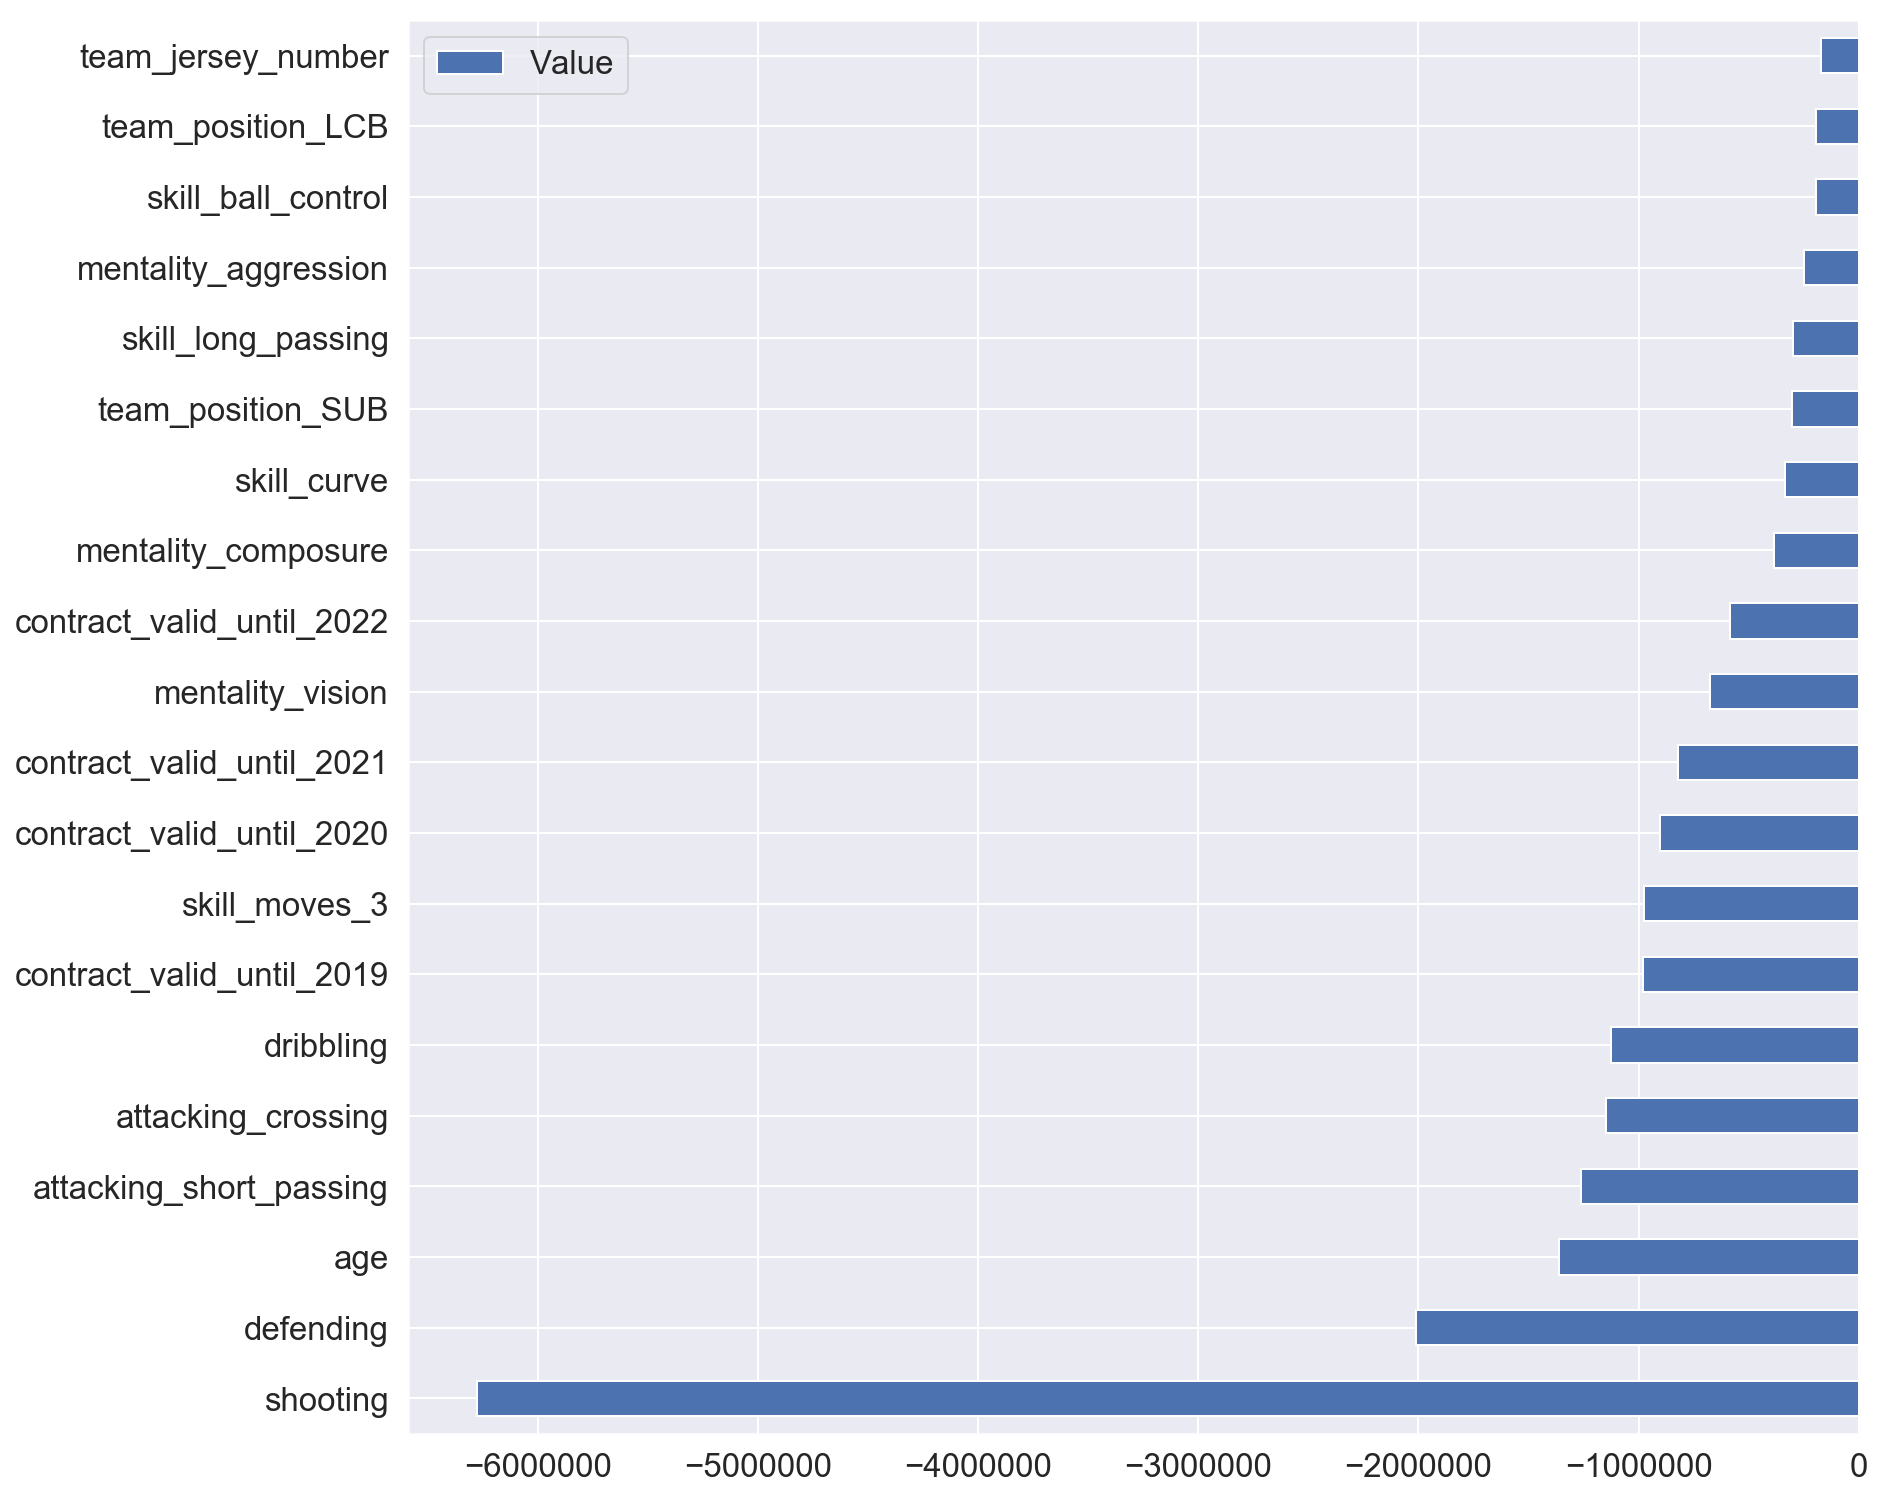

In [53]:
coefficients = pd.DataFrame({'Value': model1.coef_}, index = X_test.columns)

coefficients.sort_values(by = 'Value', ascending = True)[:20].plot(kind = 'barh', figsize = (13,13))

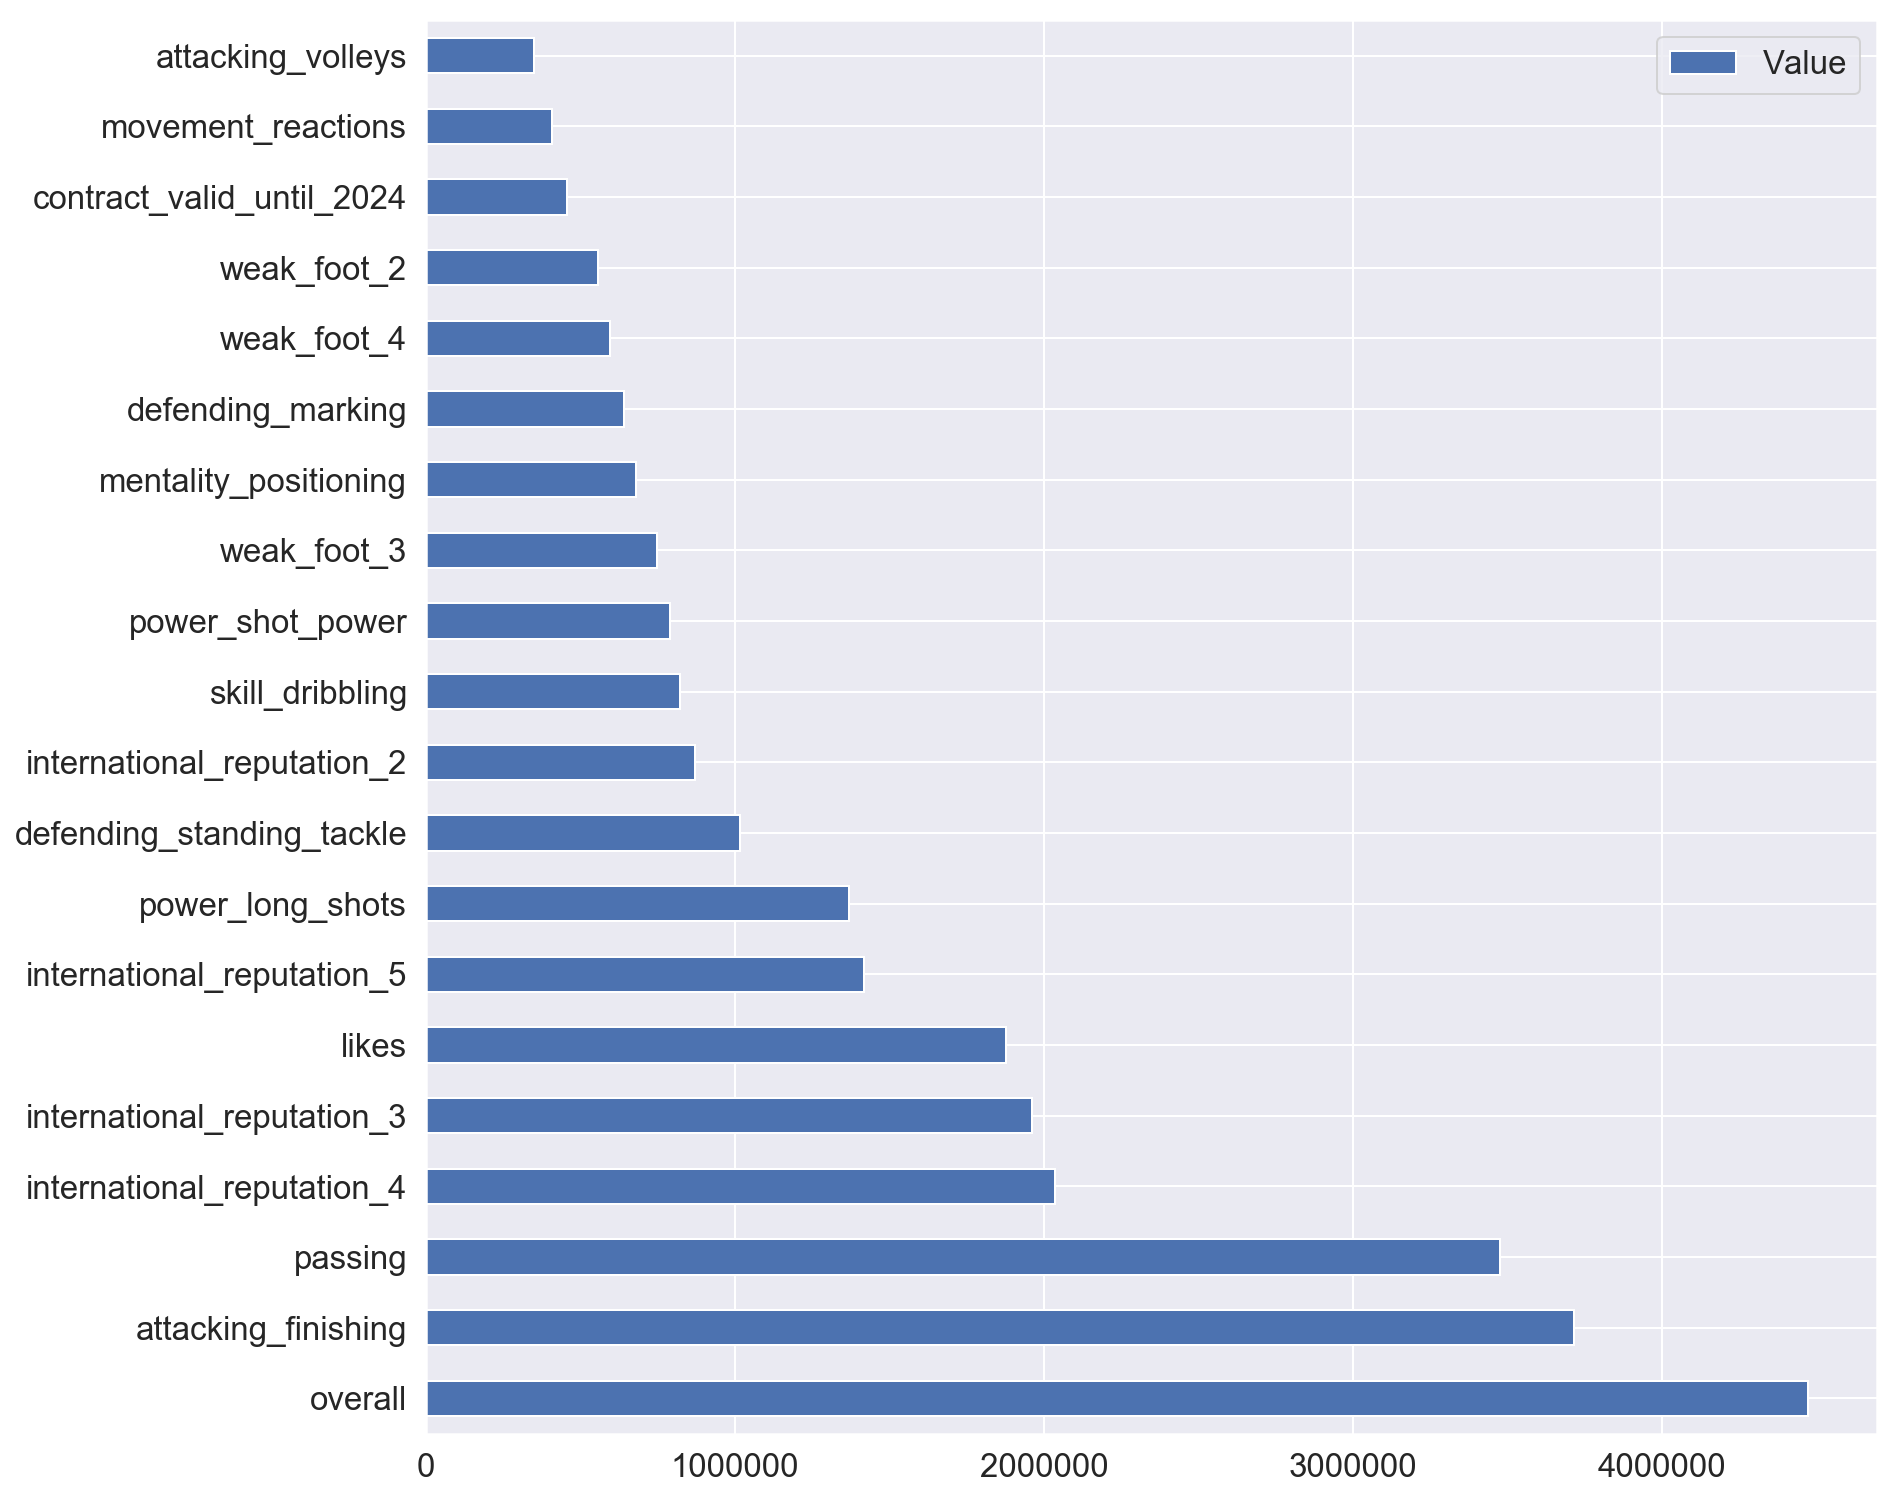

In [54]:
coefficients = pd.DataFrame({'Value': model1.coef_}, index = X_test.columns)

coefficients.sort_values(by = 'Value', ascending = False)[:20].plot(kind = 'barh',figsize=(13,13))

In [37]:
y_pred = model1.predict(X_test)

In [38]:
y_pred.shape

(447,)

In [39]:
X_test.shape

(447, 94)

In [40]:
y_test.shape

(447,)

In [41]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

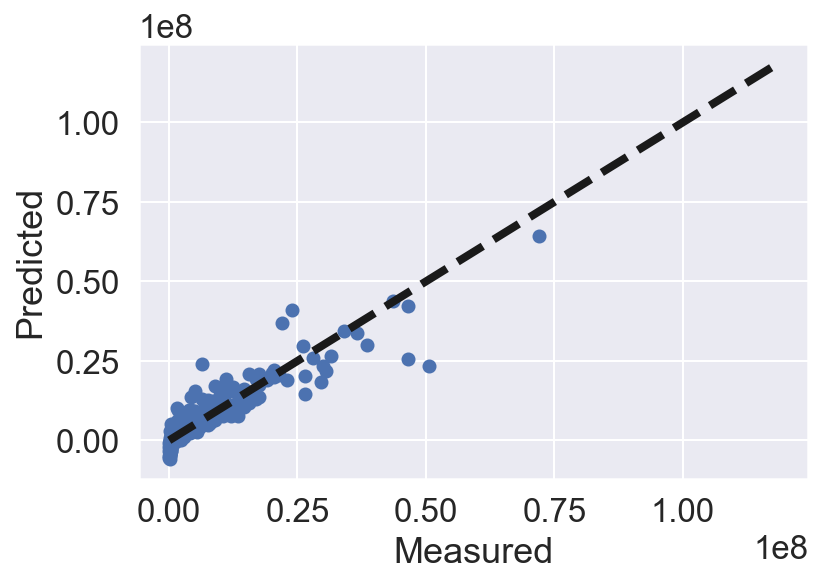

In [42]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [43]:
# create a RidgeCV model instance
model1. = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)


# fit the model
model1.fit(X_train, y_train)


# get the best alpha
print('Best alpha:', model1.alpha_)


# evaluate on the training set
print('Training score:', model1.score(X_train, y_train))


# evaluate on the test set
print("Test Score:", model1.score(X_test, y_test))

SyntaxError: invalid syntax (<ipython-input-43-cabca8c73912>, line 2)

In [ ]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 10000), cv=5)

model.fit(X_train, y_train)

print('Best alpha:', model.alpha_)

print('Training score:', model.score(X_train, y_train))

print("Test Score:", model.score(X_test, y_test))

In [ ]:
df = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
model1 = smf.ols(formula, data=df).fit()
model1.summary()
